In [ ]:
#The code below produces a plot of the Laguerre Poisson flow as described in the paper:
#"Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
#The first part precomputes the coefficients of the polynomial expansion and stores it in a file.
#The second part reads the file and produces an implicit plot, i.e. visualises the flow of the real roots.
#The accuracy of the computations depends on:
# 1. the precision of the Real and ComplexBallFields (1500), 
# 2. the integral limits (+/-100),
# 3. the number of terms in the expansion (300)
#These have been set such that X^{\mathcal{L}}_1(80) evaluates correctly at more than 20 digits accuracy. 
#Version 1.0, 23 feb 2024 

In [2]:
#Generate a plot of all ordinates of the non-trivial zeros < 80 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 80:
            m1.append([y,1])

z=list_plot(m1, size=12, marker="o", color = "red")

In [8]:
#Laguerre coefficients precomputation l_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,y,a):
    term1=CCF(I*y)/CCF(1+I*y)
    term2=CCF(1)/CCF(1+I*y)
    integr=term1.pow(n)*term2.pow(a+1)*Phi(y.abs(),60)
    return integr

def ln(n,a,M):
    res= CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genlcoeffs(a,N,M):
    f = open("lncoeffa0", "w")
    for n in range(N):
        f.write(str(ln(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genlcoeffs(0,300,100)

0

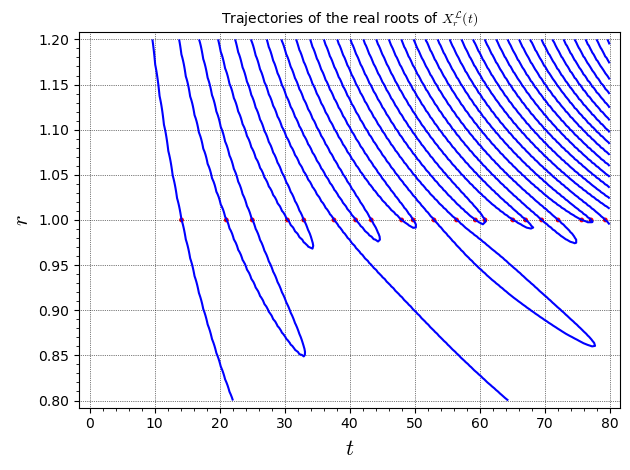

In [25]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("lncoeffa0", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def LaguerreFlow(t,r,a=0): #default parameter a=0, but this can be changed as desired
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*CCF(t).laguerre_L(n, a)
    return real_part(sum);

a=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,80),(r,0.8,1.2),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{L}}_r(t)$',gridlines=True,plot_points=120)
show(a+z,aspect_ratio='automatic')

In [10]:
#Laguerre coefficients precomputation l_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,y,a):
    term1=CCF(I*y)/CCF(1+I*y)
    term2=CCF(1)/CCF(1+I*y)
    integr=term1.pow(n)*term2.pow(a+1)*Phi(y.abs(),60)
    return integr

def ln(n,a,M):
    res= CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genlcoeffs(a,N,M):
    f = open("lncoeffa4", "w")
    for n in range(N):
        f.write(str(ln(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genlcoeffs(4,300,100)

0

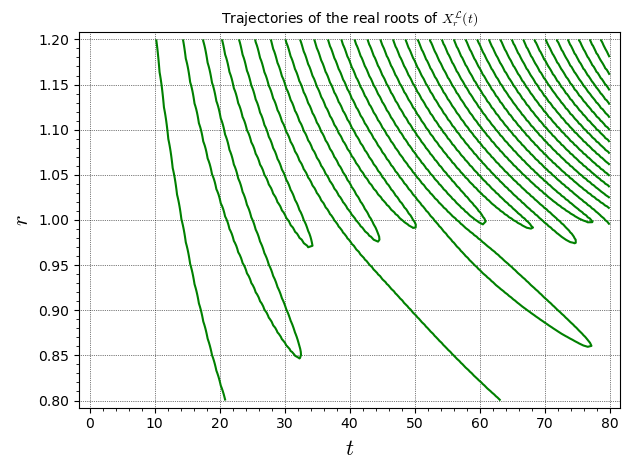

In [27]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("lncoeffa4", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def LaguerreFlow(t,r,a=4): #default parameter a=0, but this can be changed as desired
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*CCF(t).laguerre_L(n, a)
    return real_part(sum);

b=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,80),(r,0.8,1.2),color='green',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{L}}_r(t)$',gridlines=True,plot_points=120)
show(b,aspect_ratio='automatic')

In [11]:
#Laguerre coefficients precomputation l_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,y,a):
    term1=CCF(I*y)/CCF(1+I*y)
    term2=CCF(1)/CCF(1+I*y)
    integr=term1.pow(n)*term2.pow(a+1)*Phi(y.abs(),60)
    return integr

def ln(n,a,M):
    res= CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genlcoeffs(a,N,M):
    f = open("lncoeffam4", "w")
    for n in range(N):
        f.write(str(ln(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genlcoeffs(-4,300,100)

0

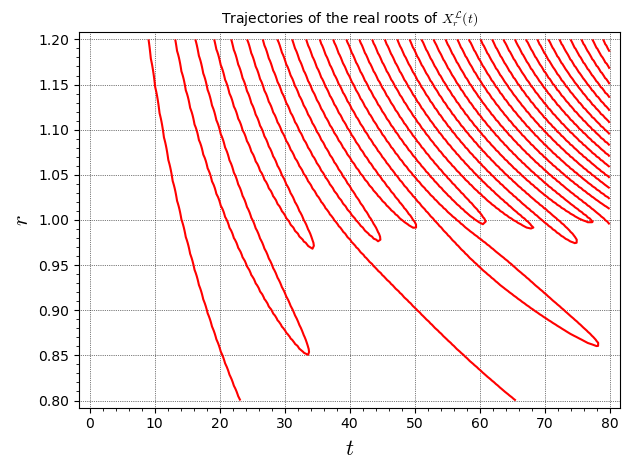

In [28]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("lncoeffam4", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def LaguerreFlow(t,r,a=-4): #default parameter a=0, but this can be changed as desired
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*CCF(t).laguerre_L(n, a)
    return real_part(sum);

c=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,80),(r,0.8,1.2),color='red',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{L}}_r(t)$',gridlines=True,plot_points=120)
show(c,aspect_ratio='automatic')

In [12]:
#Laguerre coefficients precomputation l_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,y,a):
    term1=CCF(I*y)/CCF(1+I*y)
    term2=CCF(1)/CCF(1+I*y)
    integr=term1.pow(n)*term2.pow(a+1)*Phi(y.abs(),60)
    return integr

def ln(n,a,M):
    res= CCF.integral(lambda y, _: integrand(n,y,a), -M, M)
    return real_part(res)

def genlcoeffs(a,N,M):
    f = open("lncoeffa8", "w")
    for n in range(N):
        f.write(str(ln(n,a,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genlcoeffs(8,300,100)

0

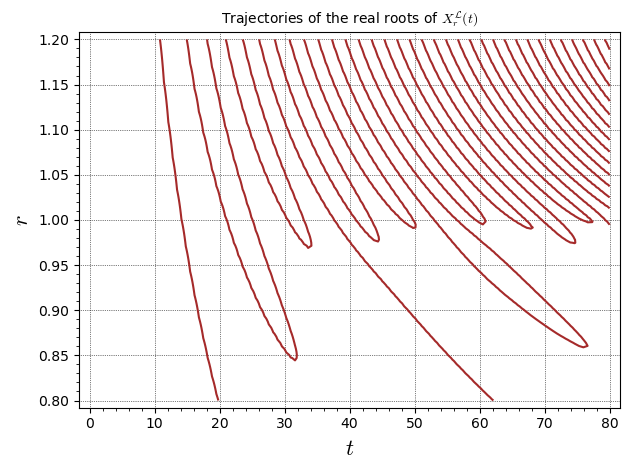

In [29]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("lncoeffa8", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def LaguerreFlow(t,r,a=8): #default parameter a=0, but this can be changed as desired
    sum=CCF(0)
    for n in range(300):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*CCF(t).laguerre_L(n, a)
    return real_part(sum);

d=implicit_plot(lambda t,r:((RDF(LaguerreFlow(t,r)))),(t,0,80),(r,0.8,1.2),color='brown',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{L}}_r(t)$',gridlines=True,plot_points=120)
show(d,aspect_ratio='automatic')

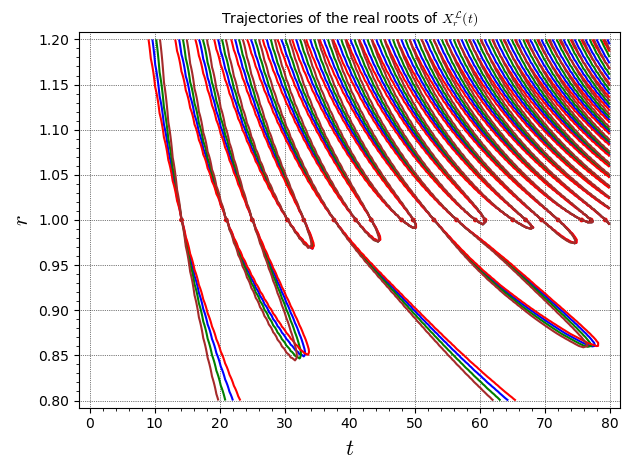

In [30]:
show(a+b+c+d+z,aspect_ratio='automatic')